# Install datacooks() package

In [2]:
if(!require(remotes)) install.packages("remotes")
if (!requireNamespace("datacooks", quietly = TRUE)) {
  remotes::install_github("agronomy4future/datacooks", force= TRUE)
}
library(remotes)
library(datacooks)

# Upload dataset

In [4]:
if(!require(readr)) install.packages("readr")
library(readr)

github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/refs/heads/main/fruit_size.csv"
df=data.frame(read_csv(url(github),show_col_types = FALSE))
set.seed(100)

print(df[sample(nrow(df),5),])

    treatment block weight_g length_cm diameter_mm area_cm2
102         B   III     39.4       9.0          30    58.35
112         B   III     78.9      10.0          44    72.23
151         B    II     57.5      10.5          50   110.89
4           A     I     28.9       8.0          34    42.67
55          A     I     92.2      10.5          65    93.56


# Model structure (weight vs area)

In [5]:
model= lm(area_cm2 ~ weight_g, data= df)
summary (model)


Call:
lm(formula = area_cm2 ~ weight_g, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.066  -5.894  -2.390   2.197  69.957 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.01093    2.14532   8.395 2.73e-14 ***
weight_g     0.98325    0.04071  24.152  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.57 on 155 degrees of freedom
Multiple R-squared:  0.7901,	Adjusted R-squared:  0.7887 
F-statistic: 583.3 on 1 and 155 DF,  p-value: < 2.2e-16


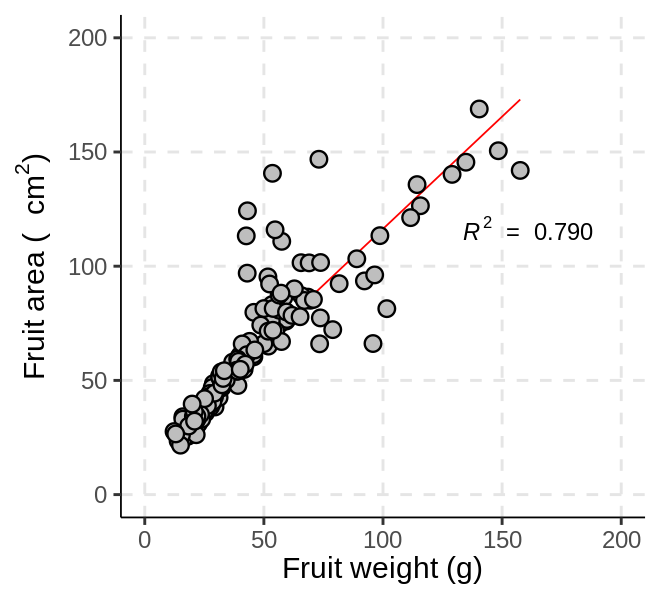

In [7]:
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(ggpmisc)) install.packages("ggpmisc")
library(ggplot2)
library(ggpmisc)

Fig= ggplot (df, aes (x=weight_g, y=area_cm2)) +
  geom_smooth(method=lm, level=0.95, se=FALSE, linetype=1,
              linewidth=0.5, color="red", formula=y~x) +
  geom_point(stroke=1, size=4, fill="grey", shape=21) +

  # R-squared
  stat_poly_eq(aes(label=paste(..rr.label.., sep= "~~~")),
               label.x=0.9, label.y=0.6, rr.digits=3,
               formula=y ~ x, parse=TRUE, size=5) +

  scale_x_continuous(breaks = seq(0,200,50), limits = c(0,200)) +
  scale_y_continuous(breaks = seq(0,200,50), limits = c(0,200)) +
  labs(x="Fruit weight (g)", y=bquote("Fruit area ("~cm^2*")")) +
  theme_classic(base_size=18, base_family="sans")+
  theme(legend.position=c(0.89,0.13),
        legend.title=element_text(size=11),
        legend.key.size=unit(0.2,'cm'),
        legend.key=element_rect(color=alpha("white",.05),
                                fill=alpha("white",.05)),
        legend.text=element_text(size=11),
        legend.background= element_rect(fill=alpha("white",.05)),
        panel.grid.major= element_line(color="grey90", linetype="dashed"),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig)

ggsave("Fig.png", plot= Fig, width=5.5, height= 5, dpi= 300)

# datacooks()

In [8]:
df1= datacooks(model, threshold= 4, clean= FALSE)

set.seed(100)
print(df1[sample(nrow(df1),5),])

    treatment block weight_g length_cm diameter_mm area_cm2 prediction
102         B   III     39.4       9.0          30    58.35   56.75088
112         B   III     78.9      10.0          44    72.23   95.58915
151         B    II     57.5      10.5          50   110.89   74.54765
4           A     I     28.9       8.0          34    42.67   46.42678
55          A     I     92.2      10.5          65    93.56  108.66634
      residual    leverage        ISR       CooksD category
102   1.599123 0.006556083  0.1101403 4.002795e-05   normal
112 -23.359147 0.015726165 -1.6163482 2.087117e-02   normal
151  36.342346 0.007732711  2.5045778 2.444231e-02   normal
4    -3.756780 0.008219032 -0.2589666 2.778833e-04   normal
55  -15.106337 0.024298731 -1.0498727 1.372492e-02   normal


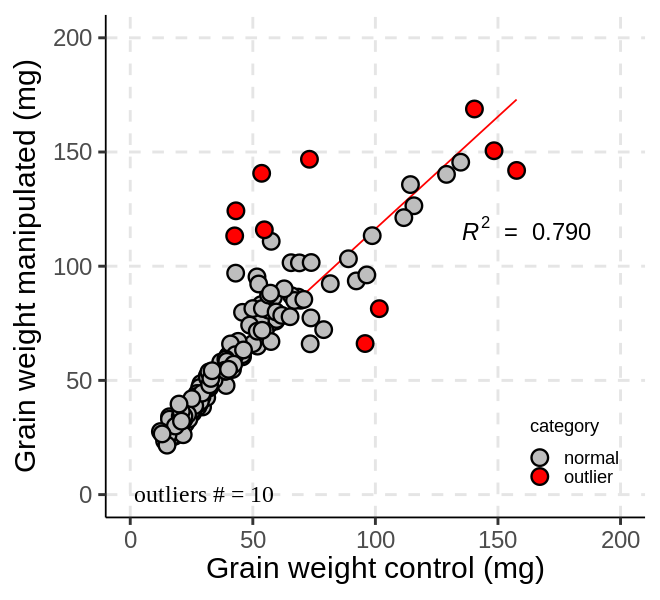

In [18]:
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(ggpmisc)) install.packages("ggpmisc")
library(ggplot2)
library(ggpmisc)

Fig1= ggplot (df1, aes (x=weight_g, y=area_cm2)) +
    geom_smooth(method=lm, level=0.95, se=FALSE, linetype=1, linewidth=0.5, color="red", formula=y~x) +
    geom_point(aes(fill=category, shape=category), stroke=1, size=4) +

  # R-squared
  stat_poly_eq(aes(label=paste(..rr.label.., sep= "~~~")),
               label.x=0.9, label.y=0.6, rr.digits=3,
               formula=y ~ x, parse=TRUE, size=5) +

  scale_fill_manual(values= c ("grey","red")) +
  scale_shape_manual(values= c (21,21)) +
  annotate("text", x= 30, y= 0, label= paste("outliers # =", sum(df1$category == "outlier")),
           family= "serif", size= 5, color= "black") +
  scale_x_continuous(breaks = seq(0,200,50), limits = c(0,200)) +
  scale_y_continuous(breaks = seq(0,200,50), limits = c(0,200)) +
  labs(x="Grain weight control (mg)", y="Grain weight manipulated (mg)") +
  theme_classic(base_size=18, base_family="sans")+
  theme(legend.position=c(0.89,0.13),
        legend.title=element_text(size=11),
        legend.key.size=unit(0.2,'cm'),
        legend.key=element_rect(color=alpha("white",.05),
                                fill=alpha("white",.05)),
        legend.text=element_text(size=11),
        legend.background= element_rect(fill=alpha("white",.05)),
        panel.grid.major= element_line(color="grey90", linetype="dashed"),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig1)

ggsave("Fig1.png", plot= Fig1, width=5.5, height= 5, dpi= 300)

# datacooks() removing outliers

In [19]:
df2= datacooks(model, threshold= 4, clean= TRUE)

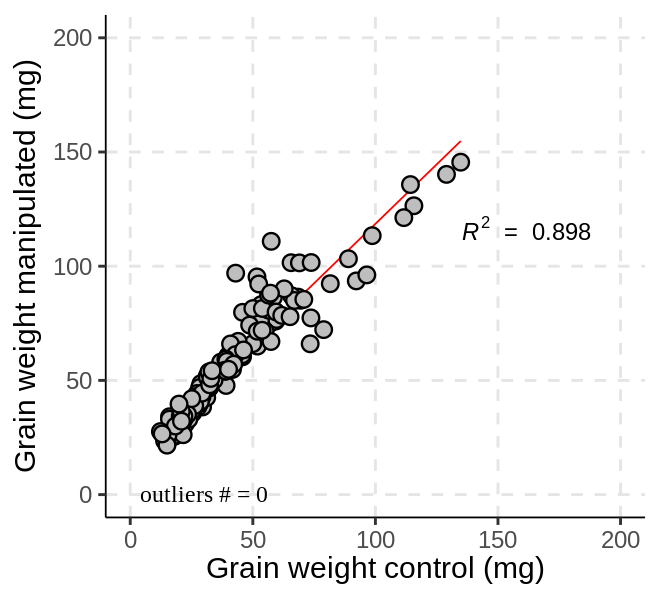

In [23]:
Fig2= ggplot (df2, aes (x=weight_g, y=area_cm2)) +
  geom_smooth(method=lm, level=0.95, se=FALSE, linetype=1, linewidth=0.5, color="red", formula=y~x) +
  geom_point(aes(fill=category, shape=category), stroke=1, size=4) +

  # R-squared
  stat_poly_eq(aes(label=paste(..rr.label.., sep= "~~~")),
               label.x=0.9, label.y=0.6, rr.digits=3,
               formula=y ~ x, parse=TRUE, size=5) +

  scale_fill_manual(values= c ("grey","red")) +
  scale_shape_manual(values= c (21,21)) +
  annotate("text", x= 30, y= 0, label= paste("outliers # =", sum(df2$category == "outlier")),
           family= "serif", size= 5, color= "black") +
  scale_x_continuous(breaks = seq(0,200,50), limits = c(0,200)) +
  scale_y_continuous(breaks = seq(0,200,50), limits = c(0,200)) +
  labs(x="Grain weight control (mg)", y="Grain weight manipulated (mg)") +
  theme_classic(base_size=18, base_family="sans")+
  theme(legend.position="none",
        legend.title=element_text(size=11),
        legend.key.size=unit(0.2,'cm'),
        legend.key=element_rect(color=alpha("white",.05),
                                fill=alpha("white",.05)),
        legend.text=element_text(size=11),
        legend.background= element_rect(fill=alpha("white",.05)),
        panel.grid.major= element_line(color="grey90", linetype="dashed"),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig2)

ggsave("Fig2.png", plot= Fig2, width=5.5, height= 5, dpi= 300)

# Model structure (diameter vs area)

In [26]:
df_clean= na.omit(df) # There are some missing values, so I deleted all missing values of the data.

model= lm(area_cm2 ~ diameter_mm, data= df_clean)
df3= datacooks(model, threshold= 4, clean= FALSE)
df4= datacooks(model, threshold= 4, clean= TRUE)

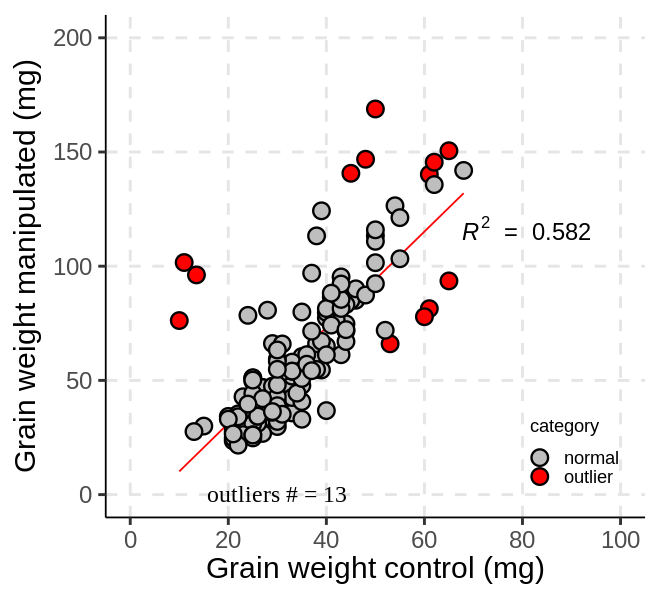

In [29]:
Fig3= ggplot (df3, aes (x=diameter_mm, y=area_cm2)) +
  geom_smooth(method=lm, level=0.95, se=FALSE, linetype=1, linewidth=0.5, color="red", formula=y~x) +
  geom_point(aes(fill=category, shape=category), stroke=1, size=4) +

  # R-squared
  stat_poly_eq(aes(label=paste(..rr.label.., sep= "~~~")),
               label.x=0.9, label.y=0.6, rr.digits=3,
               formula=y ~ x, parse=TRUE, size=5) +

  scale_fill_manual(values= c ("grey","red")) +
  scale_shape_manual(values= c (21,21)) +
  annotate("text", x= 30, y= 0, label= paste("outliers # =", sum(df3$category == "outlier")),
           family= "serif", size= 5, color= "black") +
  scale_x_continuous(breaks = seq(0,100,20), limits = c(0,100)) +
  scale_y_continuous(breaks = seq(0,200,50), limits = c(0,200)) +
  labs(x="Grain weight control (mg)", y="Grain weight manipulated (mg)") +
  theme_classic(base_size=18, base_family="sans")+
  theme(legend.position=c(0.89,0.13),
        legend.title=element_text(size=11),
        legend.key.size=unit(0.2,'cm'),
        legend.key=element_rect(color=alpha("white",.05),
                                fill=alpha("white",.05)),
        legend.text=element_text(size=11),
        legend.background= element_rect(fill=alpha("white",.05)),
        panel.grid.major= element_line(color="grey90", linetype="dashed"),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig3)

ggsave("Fig3.png", plot= Fig3, width=5.5, height= 5, dpi= 300)

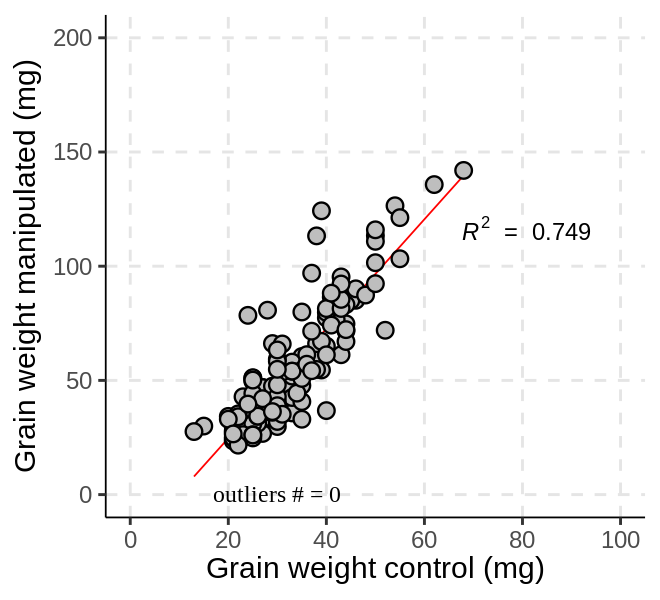

In [31]:
Fig4= ggplot (df4, aes (x=diameter_mm, y=area_cm2)) +
  geom_smooth(method=lm, level=0.95, se=FALSE, linetype=1, linewidth=0.5, color="red", formula=y~x) +
  geom_point(aes(fill=category, shape=category), stroke=1, size=4) +

  # R-squared
  stat_poly_eq(aes(label=paste(..rr.label.., sep= "~~~")),
               label.x=0.9, label.y=0.6, rr.digits=3,
               formula=y ~ x, parse=TRUE, size=5) +

  scale_fill_manual(values= c ("grey","red")) +
  scale_shape_manual(values= c (21,21)) +
  annotate("text", x= 30, y= 0, label= paste("outliers # =", sum(df4$category == "outlier")),
           family= "serif", size= 5, color= "black") +
  scale_x_continuous(breaks = seq(0,100,20), limits = c(0,100)) +
  scale_y_continuous(breaks = seq(0,200,50), limits = c(0,200)) +
  labs(x="Grain weight control (mg)", y="Grain weight manipulated (mg)") +
  theme_classic(base_size=18, base_family="sans")+
  theme(legend.position="none",
        legend.title=element_text(size=11),
        legend.key.size=unit(0.2,'cm'),
        legend.key=element_rect(color=alpha("white",.05),
                                fill=alpha("white",.05)),
        legend.text=element_text(size=11),
        legend.background= element_rect(fill=alpha("white",.05)),
        panel.grid.major= element_line(color="grey90", linetype="dashed"),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig4)

ggsave("Fig4.png", plot= Fig4, width=5.5, height= 5, dpi= 300)